In [31]:
library(tidyverse)

## Question B

## 1.

In [32]:
#Importing the data
library(haven)
Rehab = read_sav("Rehabilitaion.sav")
head(Rehab)

ID,AGE,IVHX,CENTRE,THERAPY,GENDER,RESPONSE
<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>
1,39,1,1,1,1,0
2,33,2,1,1,1,0
3,33,1,1,1,1,0
4,32,1,1,2,1,0
5,24,3,1,1,2,1
6,30,1,1,1,1,0


In [33]:
#Declaring the variables that are factors
Rehab$IVHX <- factor(Rehab$IVHX)
levels(Rehab$IVHX) 

Rehab$IVHX=relevel(Rehab$IVHX,ref="3");
levels(Rehab$IVHX) # (3 = Non User) is reference

[1] "1" "2" "3"

[1] "3" "1" "2"

In [34]:
Rehab$CENTRE <- factor(Rehab$CENTRE)
levels(Rehab$CENTRE) # (1 = Metropolitan) is reference

[1] "1" "2"

In [35]:
Rehab$THERAPY <- factor(Rehab$THERAPY)
levels(Rehab$THERAPY)
 
Rehab$THERAPY=relevel(Rehab$THERAPY,ref="2"); 

levels(Rehab$THERAPY) # (2 = Standard) is reference

[1] "1" "2"

[1] "2" "1"

In [36]:
Rehab$Genderf = as.factor(Rehab$GENDER)
levels(Rehab$Genderf)

Rehab$Genderf=relevel(Rehab$Genderf,ref="2"); 
levels(Rehab$Genderf) # (2 = Female) is reference

[1] "1" "2"

[1] "2" "1"

## 2.

In [37]:
##Chi-square test for association
#Convert data to a table
Rehabtable = table(Rehab$THERAPY,Rehab$RESPONSE)
Rehabtable #Show table
chisq.test(Rehabtable,correct=FALSE) #Chi-square test

   
      0   1
  2 187  62
  1 166  85


	Pearson's Chi-squared test

data:  Rehabtable
X-squared = 4.84, df = 1, p-value = 0.02781


The p-value is approximately 0.02781 which is less than 0.05, so there is sufficient evidence to reject the null hypothesis of no association. 

There is significant evidence of an association between the outcome and participating in the education program. 

In [38]:
#Odds ratio
(85*187)/(166*62)

[1] 1.544403

OR = 1.544, the likelihood of getting no further convictions in the following two years is approximately 1.544 times higher for criminals that have participated in the education program, compared to those that have had the standard therapy.

## 3.

In [39]:
#Stratified Analysis, gender as stratification variable
Rehabtable = xtabs( ~ THERAPY + RESPONSE + GENDER, data=Rehab)
Rehabtable #show table

(58*151)/(122*42) #OR for Males
(27*36)/(44*20)   #OR for Females


, , GENDER = 1

       RESPONSE
THERAPY   0   1
      2 151  42
      1 122  58

, , GENDER = 2

       RESPONSE
THERAPY   0   1
      2  36  20
      1  44  27


[1] 1.709212

[1] 1.104545

OR 1 = 1.709

OR 2 = 1.105

The Odds ratios for males and females are both greater than 1.0, which indicates that for both genders, the likelihood of not getting further convictions is positively associated with participation in the education program.

In [40]:
install.packages("vcd") ##Package needed for woolf test

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
library(vcd)
woolf_test(Rehabtable) #Test of homogeneity


	Woolf-test on Homogeneity of Odds Ratios (no 3-Way assoc.)

data:  Rehabtable
X-squared = 0.98555, df = 1, p-value = 0.3208


The test of homogeneity gives a p-value of approximately 0.3208, which is not significant. This suggests that the outcome does not vary significantly by gender.

In [42]:
#Obtain OR after adjusting for gender
mantelhaen.test(Rehabtable)


	Mantel-Haenszel chi-squared test with continuity correction

data:  Rehabtable
Mantel-Haenszel X-squared = 3.8683, df = 1, p-value = 0.04921
alternative hypothesis: true common odds ratio is not equal to 1
95 percent confidence interval:
 1.020061 2.224837
sample estimates:
common odds ratio 
         1.506476 


OR = 1.506

95% CI = (1.020, 2.225)

The pooled OR, after adjusting for gender, of approximately 1.506 indicates that criminals that participate in the education programme are 1.506 times more likely to have no further convictions after two years compared to those that do not participate. 


The Confidence Interval does not include 1.0, which further supports this conclusion, and suggests that participating in the programme increases the likelihood of no further convictions after two years by between 1.020 and 2.225 times.

In [43]:
#Percentage difference between crude and adjusted OR, using values from output
 ((1.54440342013214-1.506476)/1.54440342013214)*100

[1] 2.455797

The difference between crude (OR = 1.544) and adjusted (OR = 1.506) is approximately 2.456%, which is less than 10%. This indicates that there is no evidence of confounding in this study.

## 4.

In [44]:
#Logistic regression model
model.full = glm(RESPONSE ~ AGE + IVHX + CENTRE + THERAPY + Genderf, data=Rehab, family = binomial(link="logit"))
summary(model.full)


Call:
glm(formula = RESPONSE ~ AGE + IVHX + CENTRE + THERAPY + Genderf, 
    family = binomial(link = "logit"), data = Rehab)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7392  -0.7955  -0.6176   1.0702   2.2339  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.29324    0.61578  -3.724 0.000196 ***
AGE          0.05237    0.01836   2.852 0.004348 ** 
IVHX1       -0.89037    0.26046  -3.419 0.000630 ***
IVHX2       -0.64802    0.30431  -2.129 0.033215 *  
CENTRE2      1.19327    0.24900   4.792 1.65e-06 ***
THERAPY1     0.42584    0.21011   2.027 0.042688 *  
Genderf1    -0.42994    0.23754  -1.810 0.070300 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 605.69  on 499  degrees of freedom
Residual deviance: 552.02  on 493  degrees of freedom
AIC: 566.02

Number of Fisher Scoring iterations: 4


The reference groups are 3 = Non User, 1 = Metropolitan, 2 = Standard, 2 = Female for "IVHX", "CENTRE", "THERAPY" and "GENDER" respectively.


All variables except "GENDER" are significant predictors of response, since their p-values are less than 0.05. The most significant predictor is "Centre" as it has the smallest p-value. This suggests that criminals from the metropolitan area are the best predictor of outcome.

This is followed by "IVHX1", "AGE", "IVHX2" and "THERAPY1".

Current drug users are more signifcant predictors of outcome compared to ex drug users because the p-value is lower.

The fitted model is:

$$\ln(Odds) = -2.293 + 0.052 * AGE - 0.890 * IVHX(1) -0.648 * IVHX(2) + 1.193 * CENTRE(2) + 0.426 * THERAPY(1)$$




The **fitted model** can then be written as:



ln(Odds) = -2.293 + 0.052(Age) - 0.890(Current User) - 0.648(Ex User) + 1.193(Urban Centre) + 0.426(Test Therapy)

In [45]:
install.packages("ResourceSelection") #package needed to test goodness of fit
library(ResourceSelection)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
#Goodness of fit test, divided into 10 subgroups
hl<-hoslem.test(model.full$y, fitted(model.full), g=10)
hl


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  model.full$y, fitted(model.full)
X-squared = 10.431, df = 8, p-value = 0.2361


Using the Lemeshow goodness of fit test, the p-value is approximately 0.236, which is not significant. This indicates that there is no evidence that the model gives a poor fit.

In [47]:
#Finding the Odds Ratios and their 95% CI:
exp(coef(model.full))
exp(confint(model.full))

(Intercept)         AGE       IVHX1       IVHX2     CENTRE2    THERAPY1 
  0.1009390   1.0537612   0.4105039   0.5230805   3.2978539   1.5308752 
   Genderf1 
  0.6505462

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.02968247,0.3333451
AGE,1.01676518,1.0928367
IVHX1,0.24485372,0.6810689
IVHX2,0.28427105,0.9402370
CENTRE2,2.02867923,5.3949995
THERAPY1,1.01581248,2.3175414
Genderf1,0.40897151,1.0394868


**Effect of each predictor:**

AGE OR = 1.054

IVHX1 OR = 0.411, this indicates that current drug users are approximately 0.411 times as likely to have no conivctions after two years compared with non users.

IVHX2 OR = 0.523, this indicates that ex drug users are approximately 0.523 times as likely to have no further convictions after two years compared with non users.

CENTRE2 OR = 3.298, this indicates that criminals from the urban region are 3.298 times as likely to have no further convictions after two years compared with criminals from the metropolitan area.

THERAPY1 OR = 1.531, this indicates that criminals that participated in the education programme are 1.531 times as likely to have no further convictions after two years compared with criminals that were given the standard treatment.

GENDERF1 OR = 0.651, this indicates that males are 0.651 times as likely to have no further convictions after two years when compared to females. However, gender was found to not be a significant predictor in the regression model.

## 5.

In [48]:
#Estimating probability of no further convictions for the 32 year old female, using values from output
exp(-2.29324 + 0.05237*(32) - 0.89037*(1) - 0.64802*(0) + 1.19327*(2) + 0.42584*(1))
3.68625117537077/(1 + 3.68625117537077) #Probability = Odds/(1 + Odds)

[1] 3.686251

[1] 0.7866098

Using the fitted model, the probability that the 32 year old female does not reoffend within two years of release from prison is approximately 0.787.

## Question C

## 2.

In [49]:
##Entering the data, Control = Group A, Treatment = Group B
Input = ("
group relapsetime status
B 2 1
B 6 1
B 6 1
B 6 0
B 7 1
B 9 0
B 10 1
B 10 0
B 11 0
B 13 1
B 17 0
B 18 1
B 19 0
B 20 0
B 22 1
B 24 1
B 25 0
B 32 0
B 32 0
B 34 0
B 35 0
B 36 0
A 1 1
A 2 1
A 2 1
A 3 1
A 4 1
A 4 1
A 5 1 
A 5 1
A 8 1
A 8 1
A 10 1
A 11 1
A 11 0
A 12 1
A 14 1
A 15 1
A 16 0
A 19 1
A 24 1
A 27 1
A 29 0
A 31 1
A 36 0
 
")
Data = read.table(textConnection(Input),header=TRUE) 
head(Data)

,group,relapsetime,status
,<chr>,<int>,<int>
1,B,2,1
2,B,6,1
3,B,6,1
4,B,6,0
5,B,7,1
6,B,9,0


In [50]:
install.packages("survival") #Package needed for Kaplan-Meier estimator
library(survival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [51]:
# Add survival object
surv.object <- with(Data, Surv(relapsetime, status)) 

# Kaplan-Meier estimator
kmall <- survfit(surv.object~1, data=Data, conf.type = "plain") 

In [52]:
# Kaplan-Meier estimator
kmrx <- survfit(surv.object~group,data=Data) 
summary(kmrx)

Call: survfit(formula = surv.object ~ group, data = Data)

                group=A 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     23       1   0.9565  0.0425       0.8767        1.000
    2     22       2   0.8696  0.0702       0.7423        1.000
    3     20       1   0.8261  0.0790       0.6848        0.996
    4     19       2   0.7391  0.0916       0.5798        0.942
    5     17       2   0.6522  0.0993       0.4839        0.879
    8     15       2   0.5652  0.1034       0.3950        0.809
   10     13       1   0.5217  0.1042       0.3528        0.772
   11     12       1   0.4783  0.1042       0.3121        0.733
   12     10       1   0.4304  0.1041       0.2679        0.692
   14      9       1   0.3826  0.1030       0.2258        0.648
   15      8       1   0.3348  0.1006       0.1858        0.603
   19      6       1   0.2790  0.0981       0.1401        0.556
   24      5       1   0.2232  0.0930       0.0986        0.505
   27      4       1

For the control Group, the estimated probability of survival beyond 12 weeks is approximately 0.430.

The 95% CI is (0.268, 0.692), which indicates that the probability of survival beyond 12 weeks is between 0.268 and 0.692.

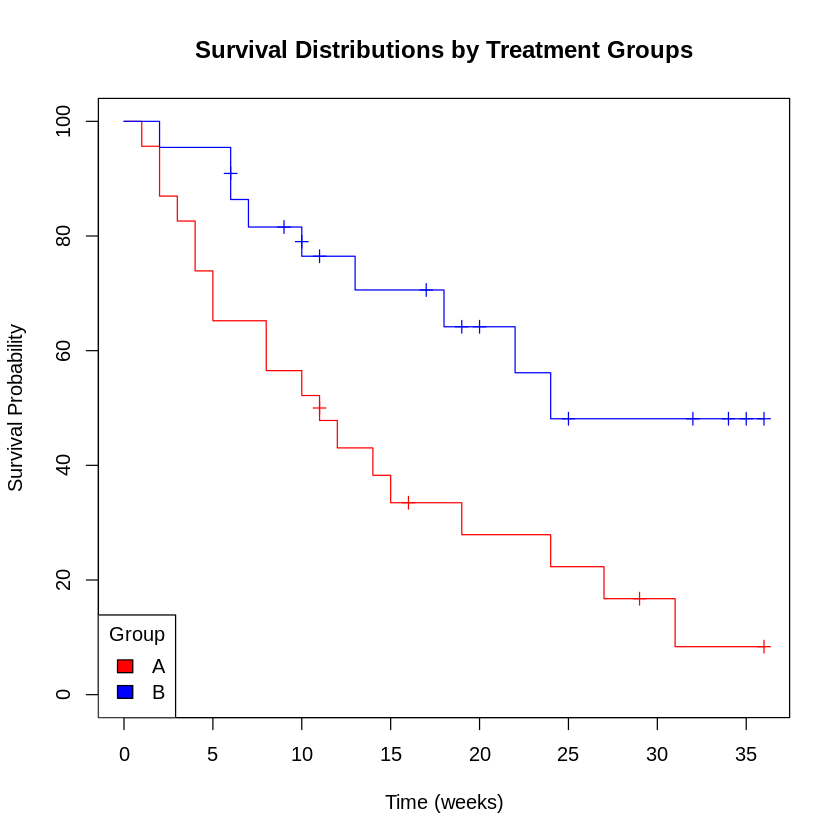

In [53]:
## Plot of the Kaplan Meier estimate
plot(kmrx, xlab="Time (weeks)",ylab="Survival Probability", yscale=100, col=c("red","blue"), main="Survival Distributions by Treatment Groups",
conf.int = FALSE, mark.time = TRUE)
legend("bottomleft", title="Group", c("A", "B"), fill=c("red", "blue")) 

From this plot, it appears that the control group A has lower survival probability, since the survival curve is consistently lower than group B. This indicates that there is a higher chance of relapse for patients in the control group compared to the test group.

In [54]:
# Fitting Cox proportional hazards model
MMod <- coxph(surv.object ~ group + relapsetime, data=Data)
MMod

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”


Call:
coxph(formula = surv.object ~ group + relapsetime, data = Data)

                  coef  exp(coef)   se(coef)      z     p
groupB      -6.380e-01  5.284e-01  7.399e-01 -0.862 0.389
relapsetime -1.686e+01  4.777e-08  8.241e+02 -0.020 0.984

Likelihood ratio test=161.6  on 2 df, p=< 2.2e-16
n= 45, number of events= 28 

In [55]:
# Computing the fitting function
hsfit<-survfit(MMod)

In [56]:
install.packages("survminer") #Package needed for plot of cumulative hazard functions
library(survminer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



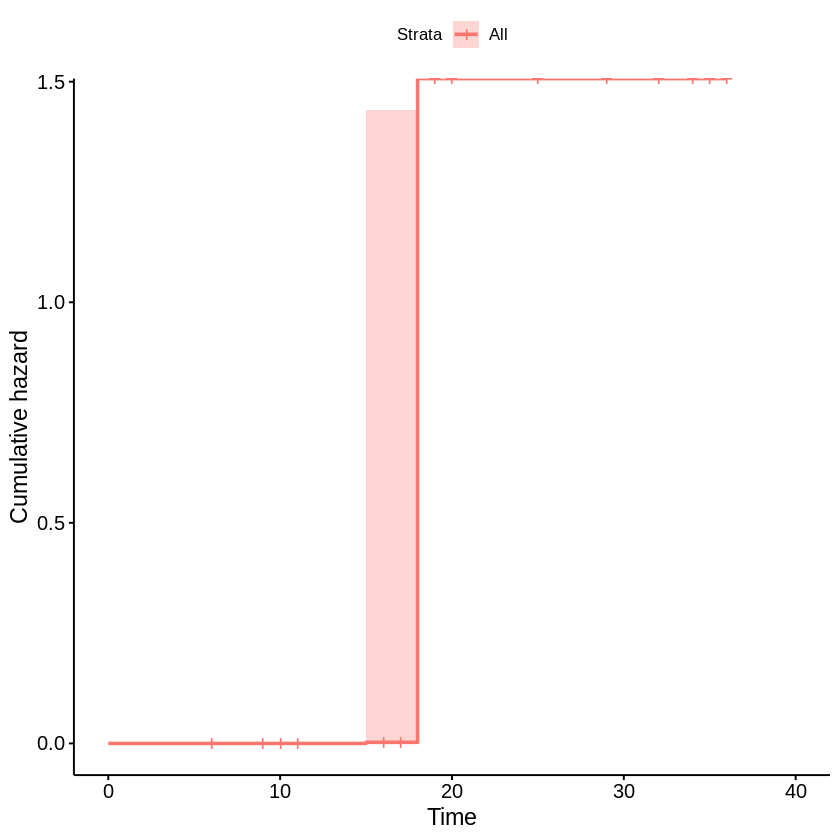

In [57]:
## Plot of the cumulative hazard functions
ggsurvplot(hsfit,fun="cumhaz",data=Data)

## 3.

In [58]:
# Logrank test
survdiff(surv.object ~ group,data=Data)

Call:
survdiff(formula = surv.object ~ group, data = Data)

         N Observed Expected (O-E)^2/E (O-E)^2/V
group=A 23       19     12.3      3.68      6.77
group=B 22        9     15.7      2.88      6.77

 Chisq= 6.8  on 1 degrees of freedom, p= 0.009 

From the logrank test, the p value is approximately 0.009, which suggests there is evidence of a significant difference in the survival functions. 

This indicates that group B has a higher survival probability compared to group A. We can conclude that there is a lower chance of relapse for patients in the control group B compared to the test group A.

## 4.

In [59]:
#Fitting Cox regression model, with the treatment as a single predictor
Mod <- coxph(surv.object ~ group,data=Data)
Mod

Call:
coxph(formula = surv.object ~ group, data = Data)

          coef exp(coef) se(coef)      z      p
groupB -1.0125    0.3633   0.4065 -2.491 0.0128

Likelihood ratio test=6.73  on 1 df, p=0.009493
n= 45, number of events= 28 

In [60]:
#Obtaining Hazard Ratio and CI's
summary(Mod)

Call:
coxph(formula = surv.object ~ group, data = Data)

  n= 45, number of events= 28 

          coef exp(coef) se(coef)      z Pr(>|z|)  
groupB -1.0125    0.3633   0.4065 -2.491   0.0128 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
groupB    0.3633      2.752    0.1638     0.806

Concordance= 0.629  (se = 0.048 )
Likelihood ratio test= 6.73  on 1 df,   p=0.009
Wald test            = 6.2  on 1 df,   p=0.01
Score (logrank) test = 6.74  on 1 df,   p=0.009


The p value of approximately 0.013 indicates significance.
The hazard ratio of 0.363 is less than 1.0, which shows that group B has higher survival rate compared to group A patients.

The hazard ratio 95% CI is (0.164, 0.806), which also shows significance, since it does not include 1.0.